# INTRODUCTION

Groups are given separate data sets as train and test with 60 features consist of 46 binary and 14 continuous variables with a binary target variable. The aim of the project is to build a classification model that predicts the unknown target values of test data close as possible to their actual values in terms of balanced error rate and area under the ROC curve. As a group we proposed an approach is given below:  
    •	Firstly, train and test data was merged as a whole data to perform manipulation steps at once.  
    •	All features were controlled in terms of skewness and outliers.  
    •	Distributions and value counts of each features were checked and highly imbalanced features (x50, x52) were discarded.  
    •	Logarithm transformation was applied for skewed and unnormal features.  
    •	MinMaxScaler method was applied to features(x1, x8, x9, x10, x11) considered as continuous.  
    •	Dummy encoding method was applied to features(x5, x6, x7) considered as nominal categorical values.  
    •	Relatively important features were detected with correlation matrix, random forest algorithm, K-Best, mutual info classifier and variance threshold below 0,05 or 0,1. 
    •	The dominant features with 5% below are discarded. 
    •	Data was separated as its original train and test data form.  
    •	SMOTENC method was applied to reduce class imbalance with generating data in minority class (for Numerical and Categorical data sets).  
    •	Classification methods were selected according to cross validation score and classification reports.
    •	Mainly, Random Forest and Gradient Boosting Classification models were used for training and prediction.  
    •	Using Grid Search with cross validation, parameters of each algorithm were tuned.  
    •	Performance metrics such as cross validation score, roc_auc score and balanced error rate were evaluated to choose the best one.  

# LITERATURE
Skewness is the measure of how much the probability distribution of a random variable deviates from the normal distribution. For example, if data is left skewed it means that it has a higher number of data points having low values. Therefore while training model on this data, it will perform better at predicting the lower values which causes bias in the prediction.  Since most of the algorithms work better under normality assumption, logarithm transformation can be applied to data to provide normality and increase the validity of the associated statistical analyses.

#### “Explorations in statistics: the log transformation.” Curran-Everett, D. (2018)   
According to Curran-Everett(2018), if the variability—the standard deviation—varies in rough proportion to the mean value of Y, a log transformation of the actual observations can equalize the standard deviations. Briefly, a log transformation can be used for stabilizing the variance. Thus, it can help the distribution of the observations themselves be more normal. It means the theoretical distribution of the sample mean becomes more normal.  
This suggestion in the paper inspired us and we tried logarithm transformation for skewed features.

You can find the related paper in [here](https://journals.physiology.org/doi/full/10.1152/advan.00018.2018?af=R).

#### “SMOTE for high-dimensional class-imbalanced data.” Rok Blagus & Lara Lusa. (2013)  
According to Lusa(2013), classification using class-imbalanced data is biased in courtesy of the majority class. The bias can increase for high-dimensional data, where the number of variables greatly exceeds the number of samples. The problem can be eliminated by undersampling or oversampling so as to produce class-balanced data. In most of the case undersampling is helpful, while random oversampling is not. Synthetic Minority Oversampling Technique (SMOTE) is an oversampling method that was proposed to improve random oversampling. Even though it is a quite useful method, its behavior on high-dimensional data has not been thoroughly investigated.  
In this paper, authors investigated the properties of SMOTE from a theoretical and empirical point of view, using simulated and real high-dimensional data. 

You can find the related paper in [here](https://bmcbioinformatics.biomedcentral.com/articles/10.1186/1471-2105-14-106).

#### “Arrhythmia Disease Classification and Mobile Based System Design.” Soha Samir AbdElMoneem, Hany Hanafy Said, and Amani Anwar Saad (2019)  
According to AbdElMoneem et al.(2020), this research examined four different oversampling techniques which are Synthetic Minority Oversampling Technique (SMOTE), Random over-sampling, Adaptive Synthetic (ADASYN) and Synthetic Minority Over-sampling Technique for Nominal and Continuous (SMOTENC). SMOTE is considered as a powerful sampling method since this algorithm creates new instances of the minority class by creating convex combinations of neighboring instances. Other over-sampling methods explained as the followings: Random over-sampling is used to repeat some samples in the classes, which are under-represented and balance the number of samples between the dataset. Therefore, it is less biased against the majority class. ADASYN generate new samples in by interpolation. However, the samples used to generate new synthetic samples which are differentiated. It focuses on generating samples next to the original samples which are mistakenly classified using a K-Nearest Neighbors classifier while the basic implementation of SMOTE will not provide any distinction between easy and hard samples to be classified using the nearest neighbors rule. Therefore, the decision function found during training are expected to be different among the algorithms. The SMOTENC is an extension of the SMOTE algorithm for which categorical data behaves differently. This paper encouraged us to use SMOTENC since we have both numerical and categorical data.

You can find the related paper in [here](https://iopscience.iop.org/article/10.1088/1742-6596/1447/1/012014/pdf).


# APPROACH
At the very beginning, data was merged so that we could interpret data as a whole. Each feature was plotted as pairplot and observed whether it is normally distributed since it is known that most of the algorithm works better under normality assumption. Thus, skewness was examined if the feature shows right or left-skewed behavior and logarithm transformation applied to provide the normality.  Additionally, outliers and value dominance were observed in the histogram for each column and a correlation matrix was created to see whether features are correlated with each other.  
Discarded due to value dominance: {x19, x20, x21, x22, x29, x31, x33, x34, x35, x36, x45, x52, x55, x50, x57, x59 and x60}  
MinMaxScaler due to wide range: {x1, x8, x9, x10 and x11}  
Discarded due to high correlation: {x37, x46, x49, and x26}  
Log1p due to Skewness correction and unnormality: {x14, x27, x30, x32, x42}  
Dummy encoding : {x5, x6 and x7}. Since these features consist of discrete integer values between 0-18 interval, it was considered that these are nominal classes and one hot encoding was applied to these features. 

SMOTENC method was used generating data in minority class to provide class balance. Since we cannot interpret test score from the original test data, we created the artificial validation data from the original training data. Training set was taken of preprocessed merged data and separated into test set with 0.2 proportion and train set with 0.8 proportion to create an artificial validation data.  

Following classification methods were evaluated by the cross validation score and the classification report constructed by the artificially created validation data. Logistic regression, decision tree, random forest, gradient boosting, support vector machine, stochastic gradient descent models were established and then Random Forest and Gradient Boosting were chosen for further classification studies. 

The original training and test data set were prepared to predict the target variable for each model. Random forest was chosen among these algorithms since best submission performance was achieved in terms of mean of cross validation score, balanced error rate and roc_auc score by tuning max _depth, min_sample_ leaf and n_estimators parameters with k-folded grid search. Even though random forest has higher values in terms of cross validation score, we can presume that there is overfitting in the training data based on confusion matrix. However, tuning the parameter helped for overfitting and confusion matrix gave us more sensible results.

# RESULTS

With the gridsearchCV, the best parameters were achieved as {'max_depth': 15, 'min_samples_leaf': 2, 'n_estimators': 200}.  

**The scores achieved by the artificial validation data:**  
*CV Roc Auc Score:* 0.9534  
*CV Accuracy Score:* 0.8682  
*Confusion Matrix:*  
|271  58|  
|35  262|  

**Submission Scores achieved by the original test data:**
*Auc_score:* 0.9122
*Ber_score:* 0.8177
*Score:* 0.8649

# CONCLUSION

For each algorithm, it was hard to determine a parameter set that tunes the model. At first, we used larger parameter set with varied values, however, Random Forest tended to overfit the original training data. By considering the relationship among max_depth, min_sample_leaf and n_estimator parameters, we heuristically reduced the variety of parameters set and examined the opposite relationship of these parameters. As a result, we observed better scores resulting in better prediction.  

# REFERENCES

Curran-Everett, D. (2018). Explorations in statistics: the log transformation. Advances in physiology education, 42(2), 343-347.

AbdElMoneem, S. S., Said, H. H., & Saad, A. A. (2020). Arrhythmia Disease Classification and Mobile Based System Design. In Journal of Physics: Conference Series (Vol. 1447, No. 1, p. 012014). IOP Publishing.

Lusa, L. (2012, December). Evaluation of smote for high-dimensional class-imbalanced microarray data. In 2012 11th International Conference on Machine Learning and Applications (Vol. 2, pp. 89-94). IEEE.


In [4]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import time
from matplotlib import pyplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import chi2
from sklearn import preprocessing
import xgboost
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from collections import Counter
from imblearn.over_sampling import SMOTENC
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [5]:
pd.set_option("display.max_columns", 150)
df_train = pd.read_csv("ProjectTrain.csv")
df_test = pd.read_csv("ProjectTest.csv")
# Replacing target values
df_train["y"].replace(to_replace = {"a" : 0 , "b" : 1}, inplace = True)
# Drop All
df_train.drop(['x26','x37','x46','x49','x50','x52','x57','x59'],axis=1,inplace=True)
df_test.drop(['x26','x37','x46','x49','x50','x52','x57','x59'],axis=1,inplace=True)
# Drop < %5 
df_train.drop(['x19','x20','x21','x22','x29','x31','x33','x34','x35','x36','x45','x55','x60'],axis=1,inplace=True)
df_test.drop(['x19','x20','x21','x22','x29','x31','x33','x34','x35','x36','x45','x55','x60'],axis=1,inplace=True)
# Merging Test and Train DataFrames
df = pd.concat([df_train,df_test], ignore_index=True)
df.describe().T

count        mean         std    min     25%    50%     75%    max
x1   4147.0   30.138172    4.656193   13.0   27.00   30.0   33.00   50.0
x2   4147.0    0.679045    0.466900    0.0    0.00    1.0    1.00    1.0
x3   4147.0    0.663130    0.472697    0.0    0.00    1.0    1.00    1.0
x4   4147.0    0.687003    0.463769    0.0    0.00    1.0    1.00    1.0
x5   4147.0    9.054738    5.525815    0.0    4.00    9.0   14.00   18.0
x6   4147.0    9.020256    5.552936    0.0    4.00    9.0   14.00   18.0
x7   4147.0    9.014227    5.507574    0.0    4.00    9.0   14.00   18.0
x8   4147.0   29.985532    5.556341   13.0   26.00   30.0   34.00   60.0
x9   4147.0  100.777695   58.516970    0.0   49.55   99.7  153.15  200.0
x10  4147.0  101.285942   57.578138    0.0   51.00  101.6  152.35  199.9
x11  4147.0   99.900627   57.605930    0.0   51.00   98.9  149.00  199.9
x12  4147.0    0.344345    0.475212    0.0    0.00    0.0    1.00    1.0
x13  4147.0    0.034000    0.181252    0.0    0.00    0.0    0.00    1.0
x14  4147.0  409.350856  119.685239   20.0  404.00  404.0  454.00  999.0
x15  4147.0    0.848806    0.358281    0.0    1.00    1.0    1.00    1.0
x16  4147.0    0.106342    0.308312    0.0    0.00    0.0    0.00    1.0
x17  4147.0    0.241138    0.427826    0.0    0.00    0.0    0.00    1.0
x18  4147.0    0.025078    0.156382    0.0    0.00    0.0    0.00    1.0
x23  4147.0    0.485652    0.499854    0.0    0.00    0.0    1.00    1.0
x24  4147.0    0.108994    0.311670    0.0    0.00    0.0    0.00    1.0
x25  4147.0    0.115746    0.319959    0.0    0.00    0.0    0.00    1.0
x27  4147.0  128.081264   72.222758   14.0   78.00  120.0  160.00  794.0
x28  4147.0    0.100796    0.301094    0.0    0.00    0.0    0.00    1.0
x30  4147.0  633.364360  158.745081   62.0  562.00  624.0  812.00  999.0
x32  4147.0  427.653002  146.375527  189.0  311.00  411.0  522.00  999.0
x38  4147.0    0.134555    0.341289    0.0    0.00    0.0    0.00    1.0
x39  4147.0    0.128286    0.334448    0.0    0.00    0.0    0.00    1.0
x40  4147.0    0.128527    0.334716    0.0    0.00    0.0    0.00    1.0
x41  4147.0    0.729925    0.444052    0.0    0.00    1.0    1.00    1.0
x42  4147.0   12.435978   85.349445    0.0    0.00    0.0    0.00  999.0
x43  4147.0    0.029419    0.168998    0.0    0.00    0.0    0.00    1.0
x44  4147.0    0.690620    0.462294    0.0    0.00    1.0    1.00    1.0
x47  4147.0    0.116470    0.320826    0.0    0.00    0.0    0.00    1.0
x48  4147.0    0.143477    0.350601    0.0    0.00    0.0    0.00    1.0
x51  4147.0    0.105860    0.307695    0.0    0.00    0.0    0.00    1.0
x53  4147.0    0.084398    0.278018    0.0    0.00    0.0    0.00    1.0
x54  4147.0    0.312997    0.463769    0.0    0.00    0.0    1.00    1.0
x56  4147.0    0.430190    0.495162    0.0    0.00    0.0    1.00    1.0
x58  4147.0    0.142995    0.350110    0.0    0.00    0.0    0.00    1.0

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4147 entries, 0 to 4146
Data columns (total 40 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      4147 non-null   int64  
 1   x2      4147 non-null   int64  
 2   x3      4147 non-null   int64  
 3   x4      4147 non-null   int64  
 4   x5      4147 non-null   int64  
 5   x6      4147 non-null   int64  
 6   x7      4147 non-null   int64  
 7   x8      4147 non-null   int64  
 8   x9      4147 non-null   float64
 9   x10     4147 non-null   float64
 10  x11     4147 non-null   float64
 11  x12     4147 non-null   int64  
 12  x13     4147 non-null   int64  
 13  x14     4147 non-null   int64  
 14  x15     4147 non-null   int64  
 15  x16     4147 non-null   int64  
 16  x17     4147 non-null   int64  
 17  x18     4147 non-null   int64  
 18  x23     4147 non-null   int64  
 19  x24     4147 non-null   int64  
 20  x25     4147 non-null   int64  
 21  x27     4147 non-null   int64  
 22  

In [4]:
y = df_train["y"]
df.drop(columns=["y"], inplace = True)

## Correlation Matrix

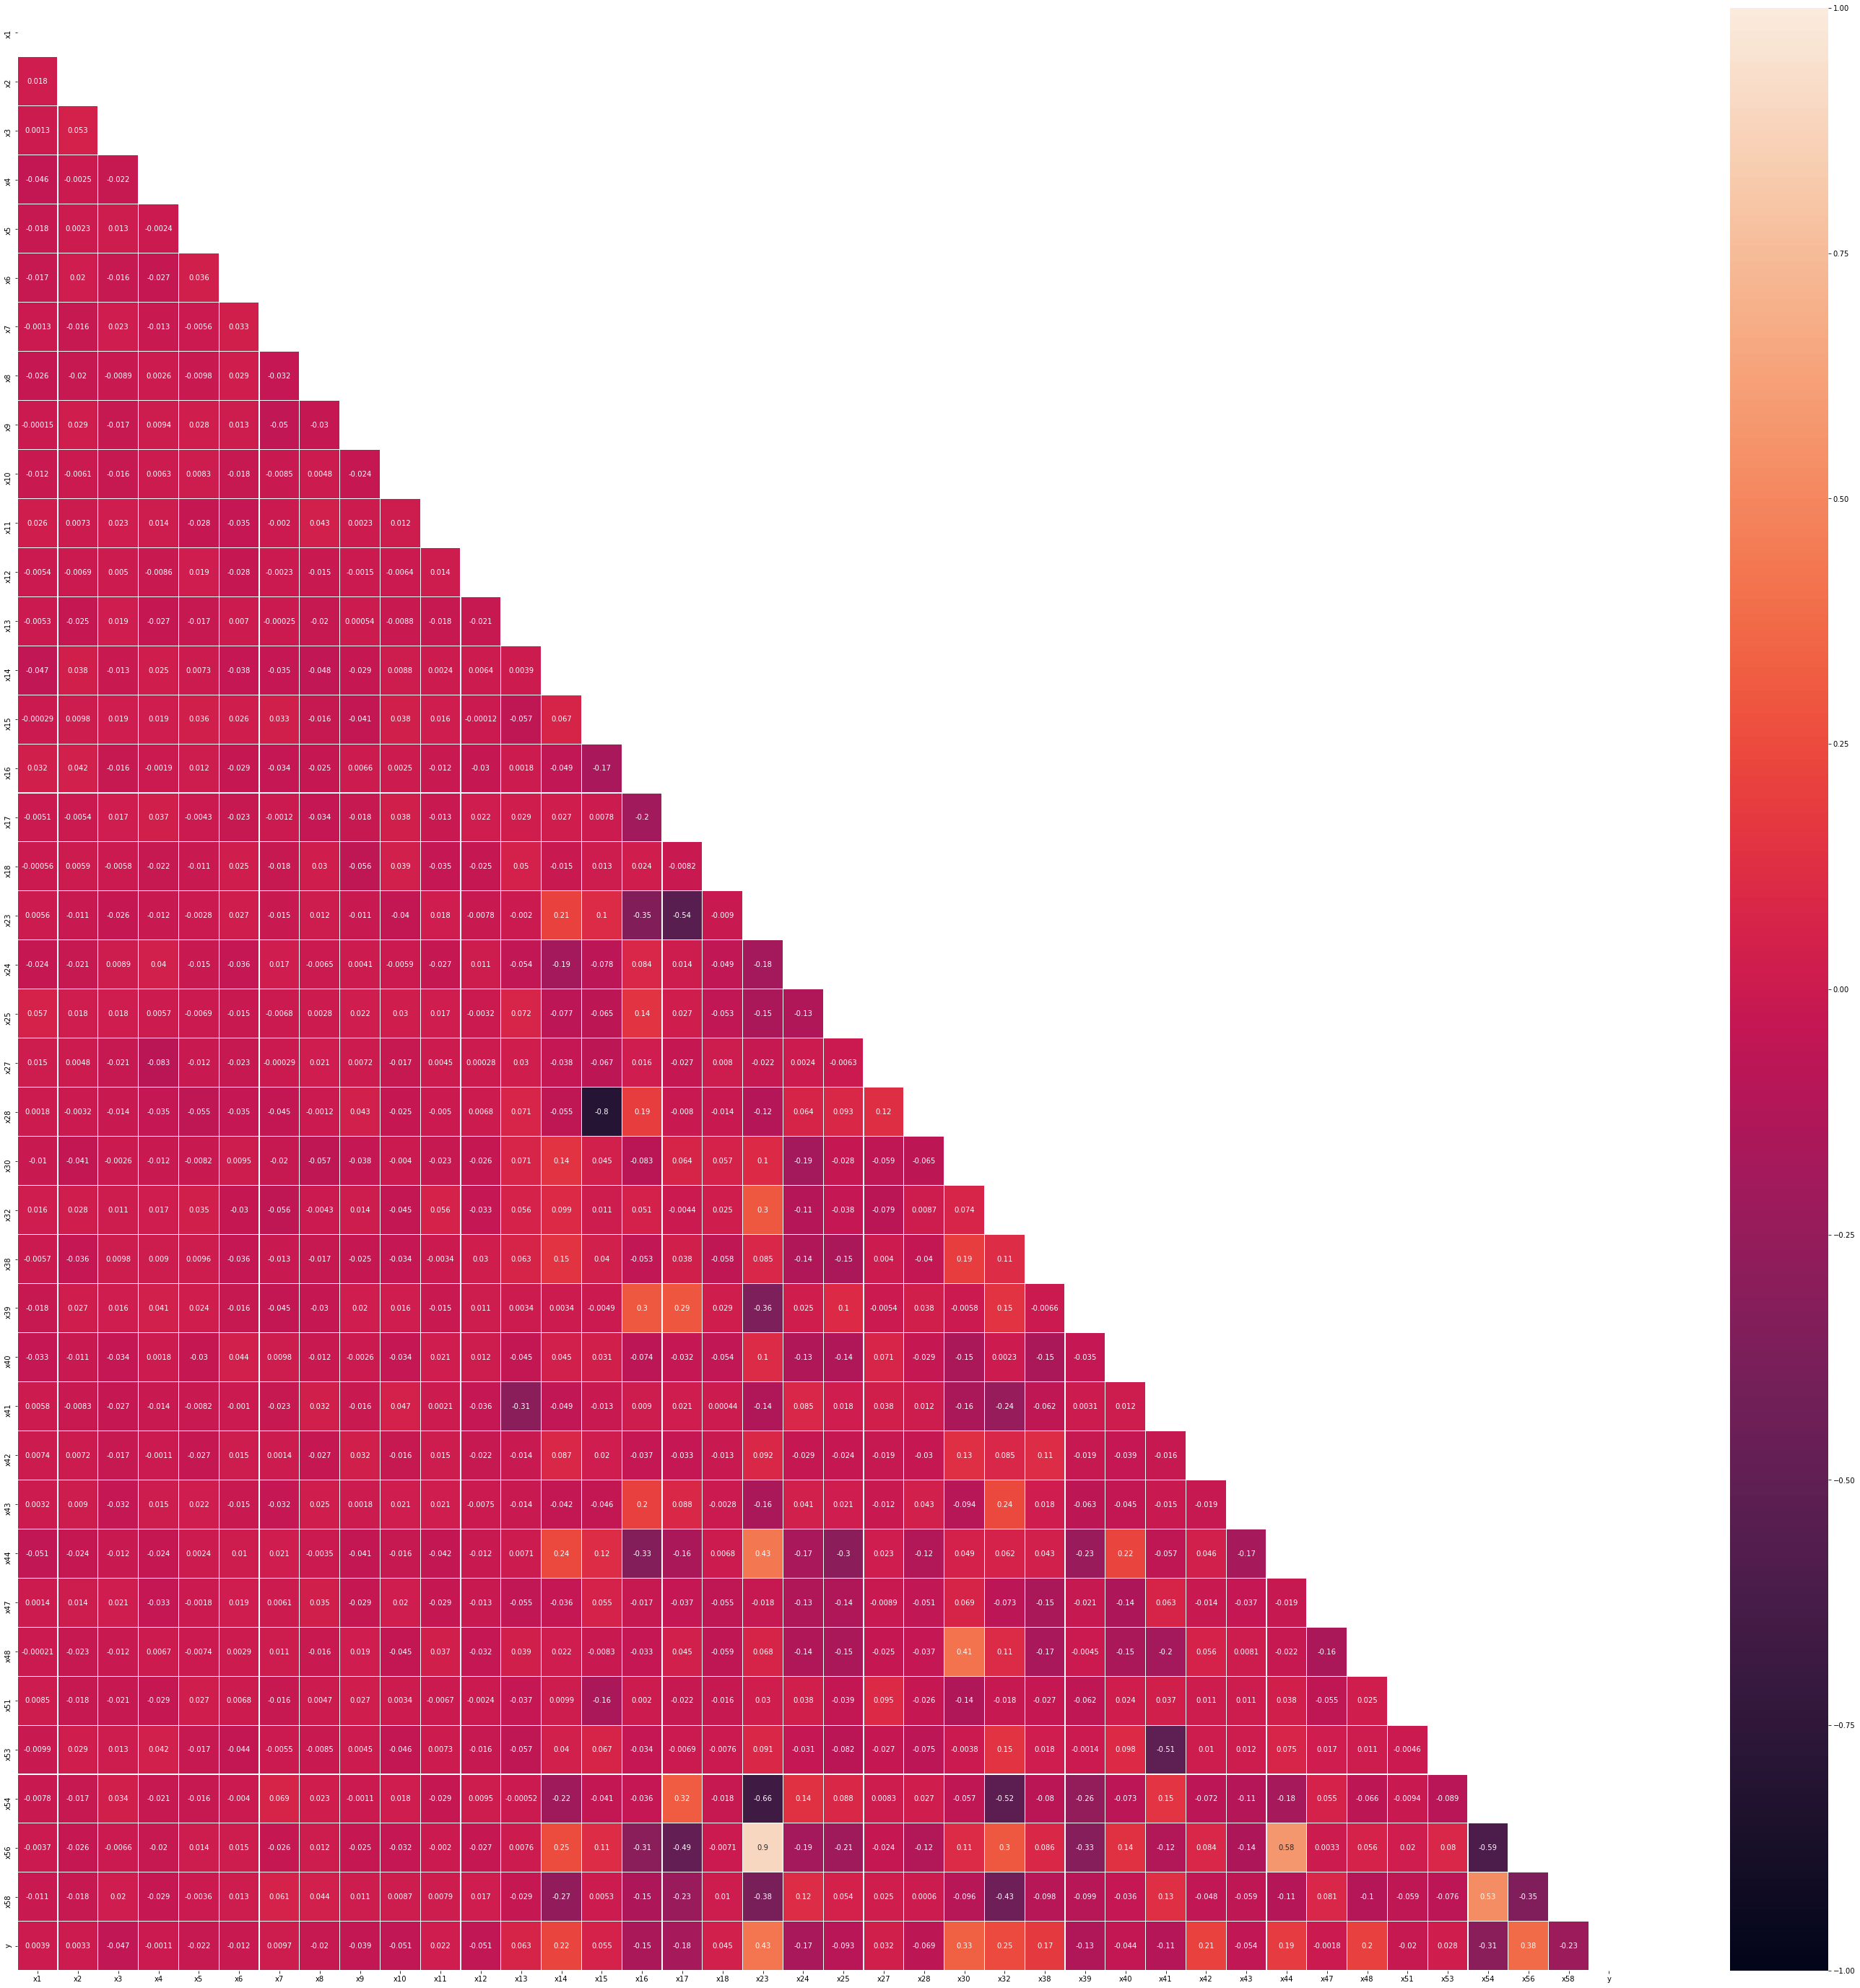

In [6]:
corr = df_train.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(50, 50))
sns_plott = sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,vmin=-1, vmax=1, annot = True, mask = mask)

## PairPlot for Continuous Features

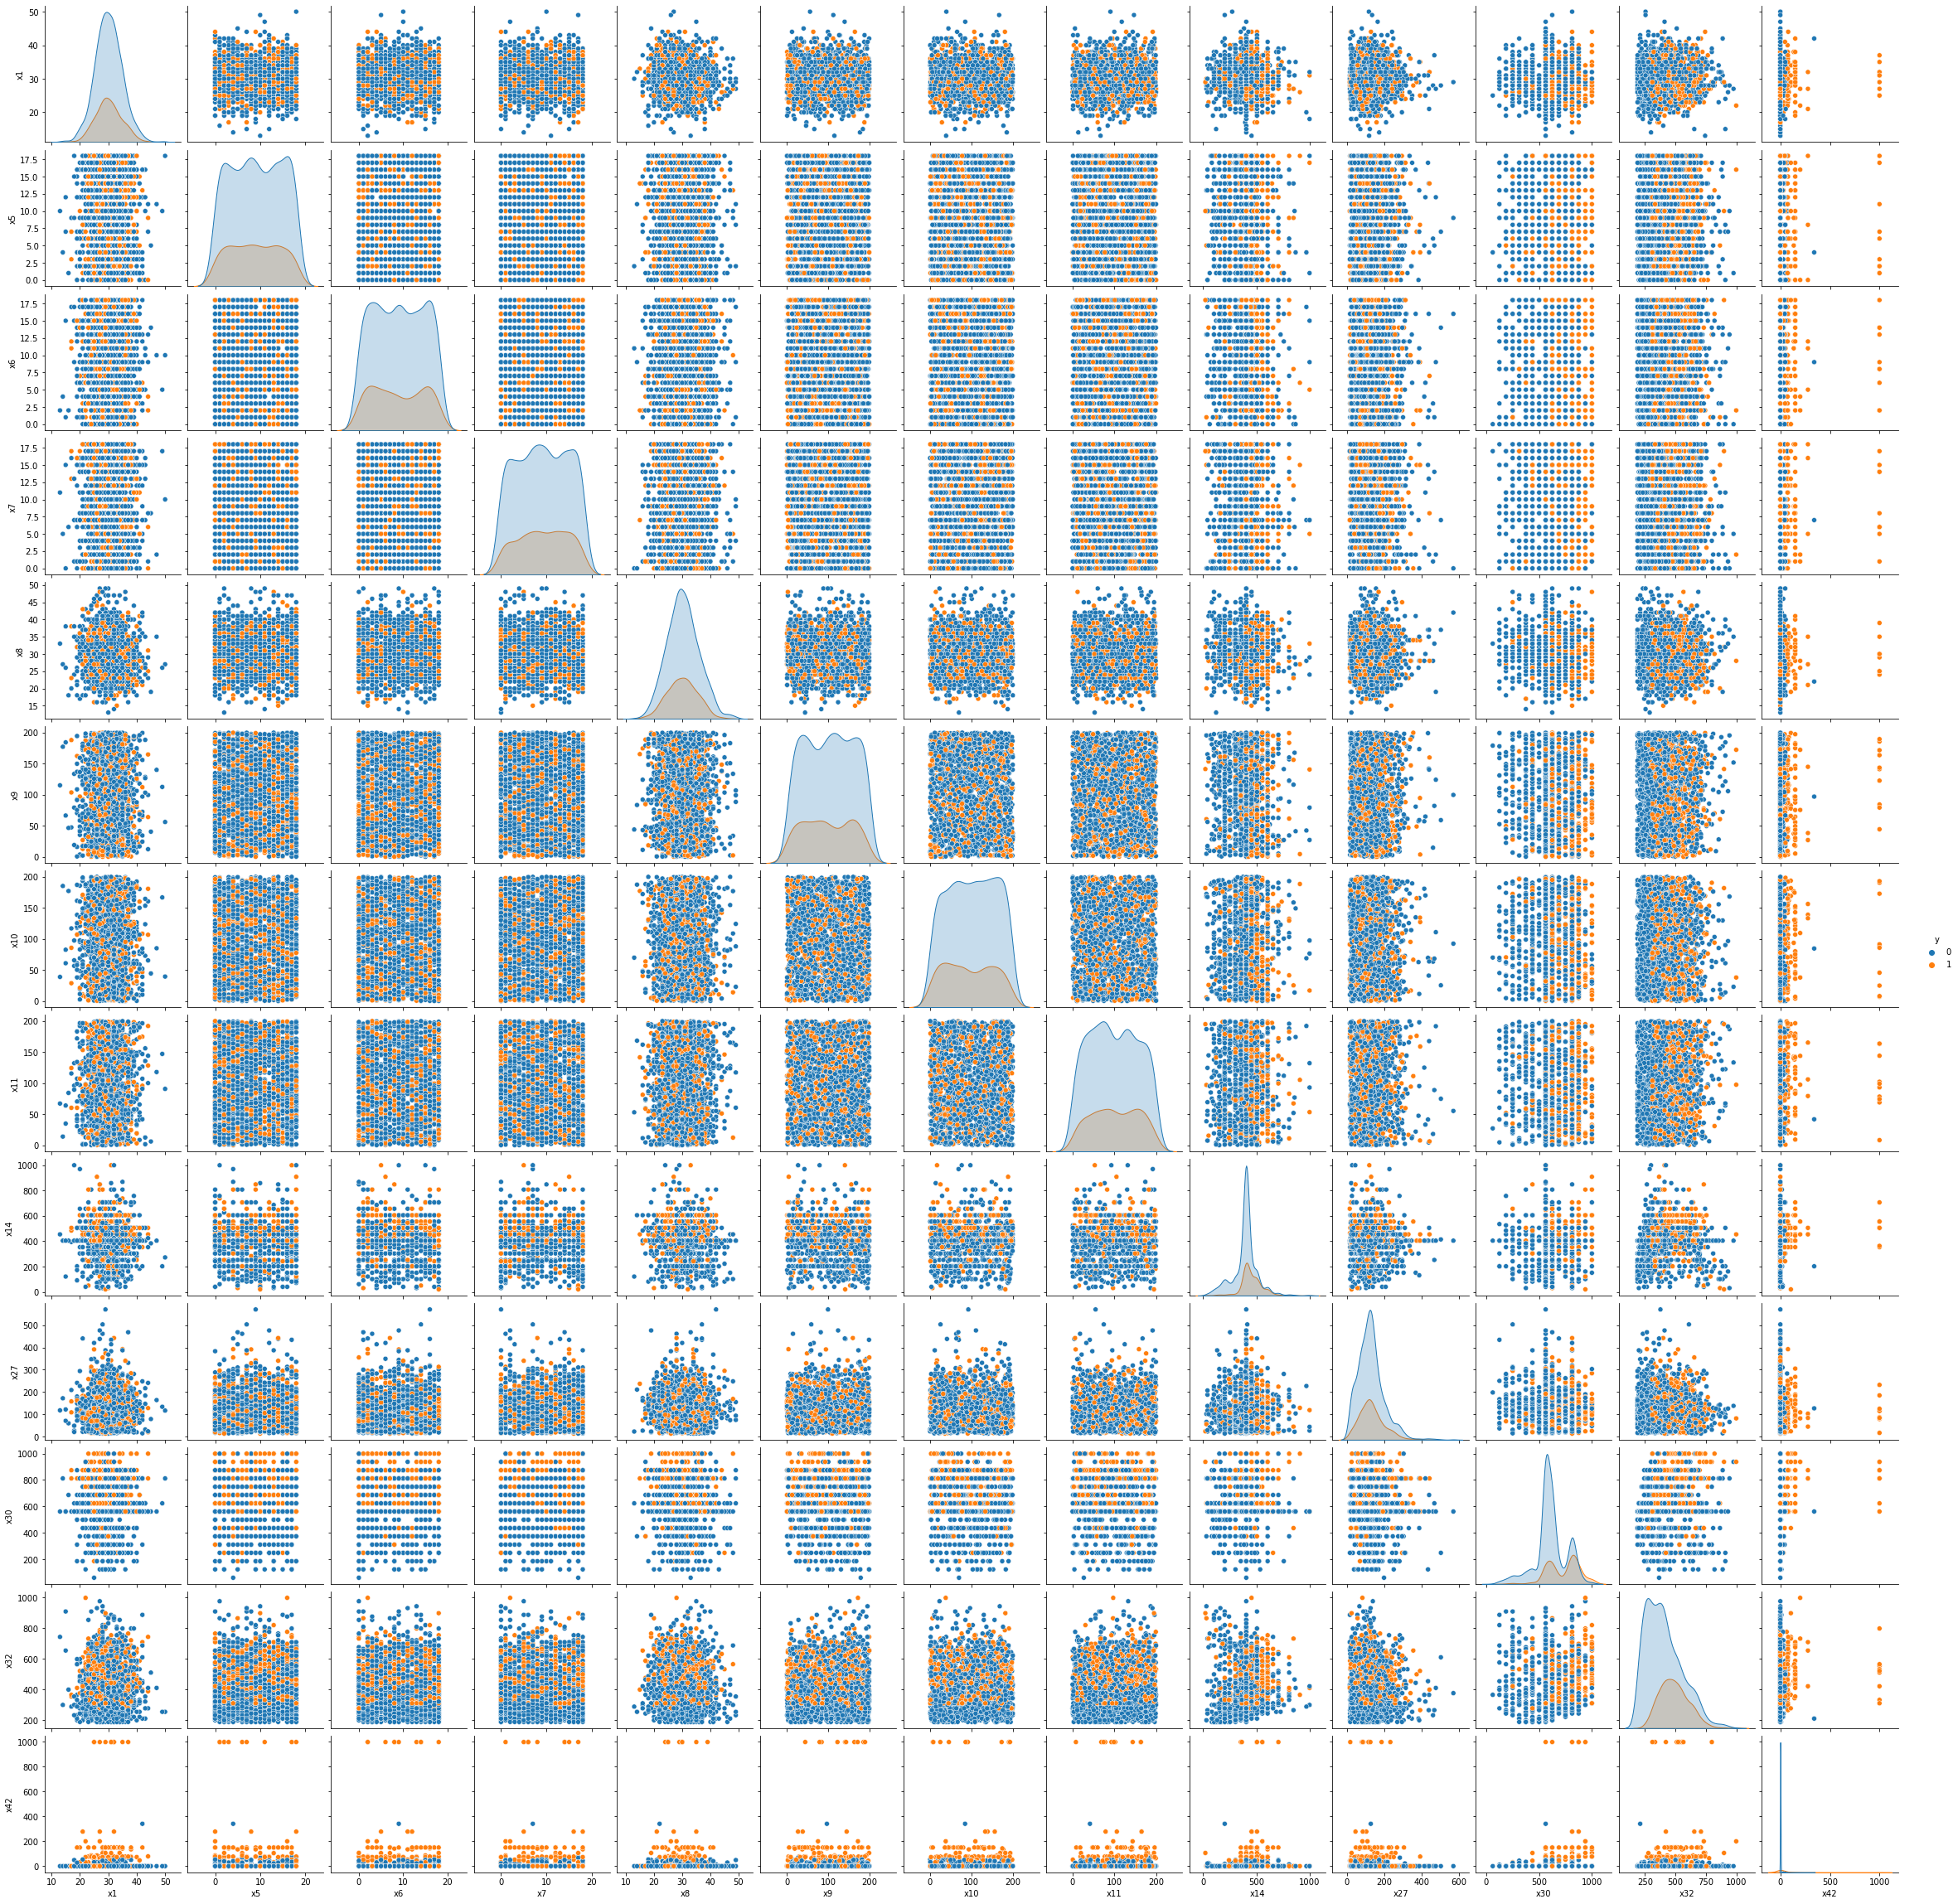

In [15]:
binary = []
for i in df.columns:
  if df[i].min() == 0.0 and df[i].max() == 1.0:
    binary.append(i)
cont_cols = [x for x in df.columns if x not in binary]
cont_cols.append("y")
sns.pairplot(df_train[cont_cols], hue = "y")

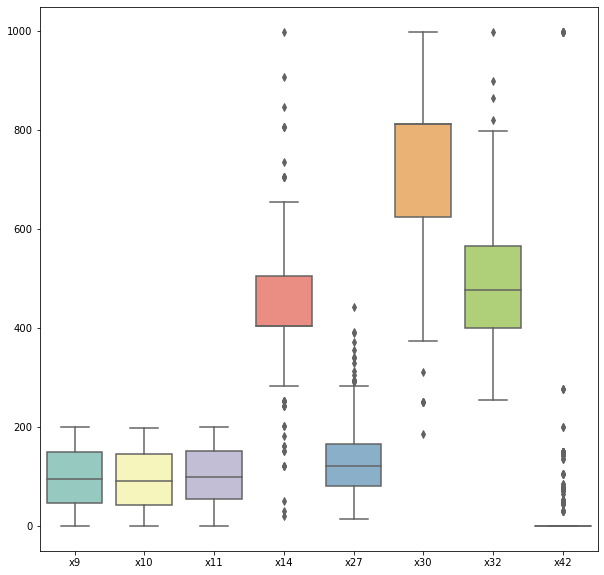

In [21]:
df_box= df_train.loc[df_train['y'] == 1]
a4_dims = (10.0, 10.0)
fig, ax = pyplot.subplots(figsize=a4_dims)
ax = sns.boxplot(data=df_box[['x9', 'x10', 'x11', 'x14', 'x27', 'x30', 'x32', 'x42']], palette="Set3")

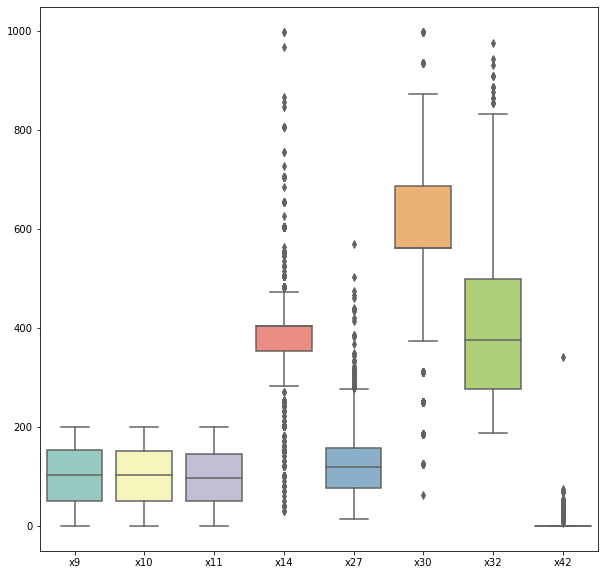

In [20]:
df_box= df_train.loc[df_train['y'] == 0]
a4_dims = (10.0, 10.0)
fig, ax = pyplot.subplots(figsize=a4_dims)
ax = sns.boxplot(data=df_box[['x9', 'x10', 'x11', 'x14', 'x27', 'x30', 'x32', 'x42']], palette="Set3")

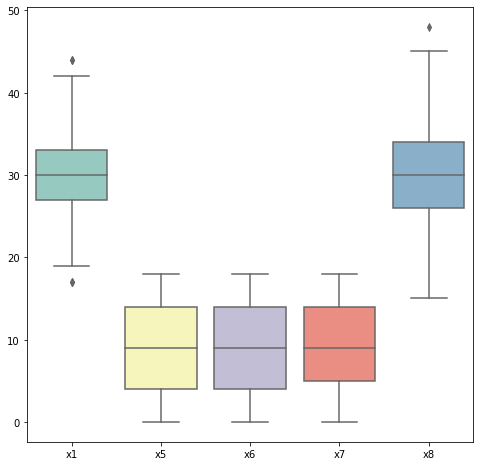

In [22]:
df_box= df_train.loc[df_train['y'] == 1]
a4_dims = (8.0, 8.0)
fig, ax = pyplot.subplots(figsize=a4_dims)
ax = sns.boxplot(data=df_box[['x1', 'x5', 'x6', 'x7', 'x8']], palette="Set3")

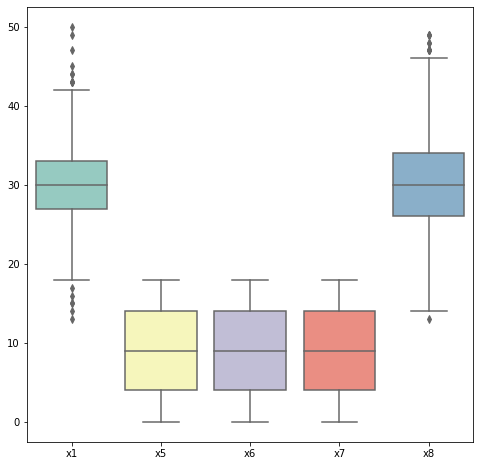

In [23]:
df_box= df_train.loc[df_train['y'] == 0]
a4_dims = (8.0, 8.0)
fig, ax = pyplot.subplots(figsize=a4_dims)
ax = sns.boxplot(data=df_box[['x1', 'x5', 'x6', 'x7', 'x8']], palette="Set3")

In [5]:
min_max_scaler = ["x1", "x8","x9", "x10", "x11"]
log = ["x14","x27","x30","x32","x42"]
df2 = df.copy()
# Log transformation for skew data 
df2[log] = np.log1p(df2[log])
# Min max scaler for continuous data
scaler = MinMaxScaler()
df2[min_max_scaler] = scaler.fit_transform(df2[min_max_scaler])
# One hot encoding for categorical data 
df2 = pd.get_dummies(df2, columns=["x5","x6",'x7'])
df2.head()

x1  x2  x3  x4        x8      x9       x10       x11  x12  x13  \
0  0.378378   1   1   1  0.319149  0.5995  0.770385  0.607304    1    0   
1  0.459459   0   1   1  0.127660  0.4335  0.664832  0.645323    0    0   
2  0.648649   0   1   1  0.425532  0.8700  0.640820  0.501251    0    0   
3  0.432432   0   1   1  0.340426  0.0440  0.634317  0.277639    1    0   
4  0.540541   1   1   0  0.553191  0.2750  0.938469  0.783392    1    0   

        x14  x15  x16  x17  x18  x23  x24  x25       x27  x28       x30  \
0  6.003887    1    0    0    0    1    0    0  4.753590    0  6.333280   
1  5.717028    1    0    0    0    1    0    0  4.867534    0  6.437752   
2  6.120297    1    0    0    0    1    0    0  5.159055    0  6.333280   
3  5.950643    1    1    0    0    0    1    0  5.641907    0  6.437752   
4  6.003887    0    0    0    0    1    0    0  5.398163    0  6.333280   

        x32  x38  x39  x40  x41  x42  x43  x44  x47  x48  x51  x53  x54  x56  \
0  5.966147    0    0    0    1  0.0    0    1    0    0    0    0    0    1   
1  5.587249    0    0    0    1  0.0    0    1    0    0    0    0    0    1   
2  6.021023    0    0    0    0  0.0    0    1    0    0    1    1    0    1   
3  6.416732    0    1    0    1  0.0    0    0    0    0    0    0    0    0   
4  5.669881    0    0    0    1  0.0    0    1    0    0    0    0    0    1   

   x58  x5_0  x5_1  x5_2  x5_3  x5_4  x5_5  x5_6  x5_7  x5_8  x5_9  x5_10  \
0    0     0     0     0     0     0     0     0     0     0     0      0   
1    0     0     0     0     0     0     0     0     0     0     0      0   
2    0     0     1     0     0     0     0     0     0     0     0      0   
3    0     0     0     0     0     0     0     0     0     0     0      0   
4    0     0     0     1     0     0     0     0     0     0     0      0   

   x5_11  x5_12  x5_13  x5_14  x5_15  x5_16  x5_17  x5_18  x6_0  x6_1  x6_2  \
0      0      0      0      0      0      0      0      1     0     0     0   
1      0      0      0      0      0      0      0      1     0     0     0   
2      0      0      0      0      0      0      0      0     0     0     0   
3      0      0      0      1      0      0      0      0     0     0     0   
4      0      0      0      0      0      0      0      0     0     0     0   

   x6_3  x6_4  x6_5  x6_6  x6_7  x6_8  x6_9  x6_10  x6_11  x6_12  x6_13  \
0     1     0     0     0     0     0     0      0      0      0      0   
1     0     0     0     0     0     0     0      0      0      0      1   
2     1     0     0     0     0     0     0      0      0      0      0   
3     0     0     0     0     0     0     1      0      0      0      0   
4     0     0     0     0     0     0     0      0      0      0      0   

   x6_14  x6_15  x6_16  x6_17  x6_18  x7_0  x7_1  x7_2  x7_3  x7_4  x7_5  \
0      0      0      0      0      0     0     1     0     0     0     0   
1      0      0      0      0      0     0     0     0     1     0     0   
2      0      0      0      0      0     0     0     0     0     0     0   
3      0      0      0      0      0     0     0     0     1     0     0   
4      0      1      0      0      0     0     0     0     0     0     0   

   x7_6  x7_7  x7_8  x7_9  x7_10  x7_11  x7_12  x7_13  x7_14  x7_15  x7_16  \
0     0     0     0     0      0      0      0      0      0      0      0   
1     0     0     0     0      0      0      0      0      0      0      0   
2     0     0     0     0      0      0      0      0      1      0      0   
3     0     0     0     0      0      0      0      0      0      0      0   
4     0     0     0     0      0      0      1      0      0      0      0   

   x7_17  x7_18  
0      0      0  
1      0      0  
2      0      0  
3      0      0  
4      0      0

In [6]:
X = df2.iloc[:2074]
X_valid = df2.iloc[2074:]

## Threshold

In [7]:
selector = VarianceThreshold(threshold = 0.1)
threshold_df = selector.fit_transform(X,y)
X_th = X.loc[:, selector.get_support()]
X_valid_th = X_valid.loc[:, selector.get_support()]
X_th.columns

Index(['x2', 'x3', 'x4', 'x12', 'x14', 'x15', 'x16', 'x17', 'x23', 'x25',
       'x27', 'x32', 'x38', 'x39', 'x40', 'x41', 'x42', 'x44', 'x47', 'x48',
       'x54', 'x56', 'x58'],
      dtype='object')

## Select K Best

In [10]:
selector = SelectKBest(chi2, k=60)
selector.fit(X,y)
best_features = list(X.columns[selector.get_support(indices = True)])
selector = SelectKBest(f_classif, k=60)
selector.fit(X,y)
best_features2 = list(X.columns[selector.get_support(indices = True)])
cols_for_model = set(best_features + best_features2)
print(cols_for_model)

{'x5_13', 'x30', 'x56', 'x9', 'x6_10', 'x5_12', 'x7_6', 'x25', 'x23', 'x11', 'x7_7', 'x6_9', 'x7_18', 'x41', 'x51', 'x7_14', 'x6_11', 'x7_8', 'x5_18', 'x40', 'x6_14', 'x3', 'x28', 'x38', 'x16', 'x58', 'x10', 'x5_16', 'x6_2', 'x54', 'x6_17', 'x7_12', 'x17', 'x8', 'x39', 'x48', 'x6_13', 'x32', 'x5_5', 'x5_11', 'x7_4', 'x24', 'x7_10', 'x12', 'x15', 'x27', 'x7_0', 'x13', 'x7_15', 'x7_5', 'x44', 'x7_16', 'x5_1', 'x14', 'x43', 'x7_3', 'x5_0', 'x6_16', 'x18', 'x7_11', 'x53', 'x42'}


## Feature Importance with Random Forest Classifier

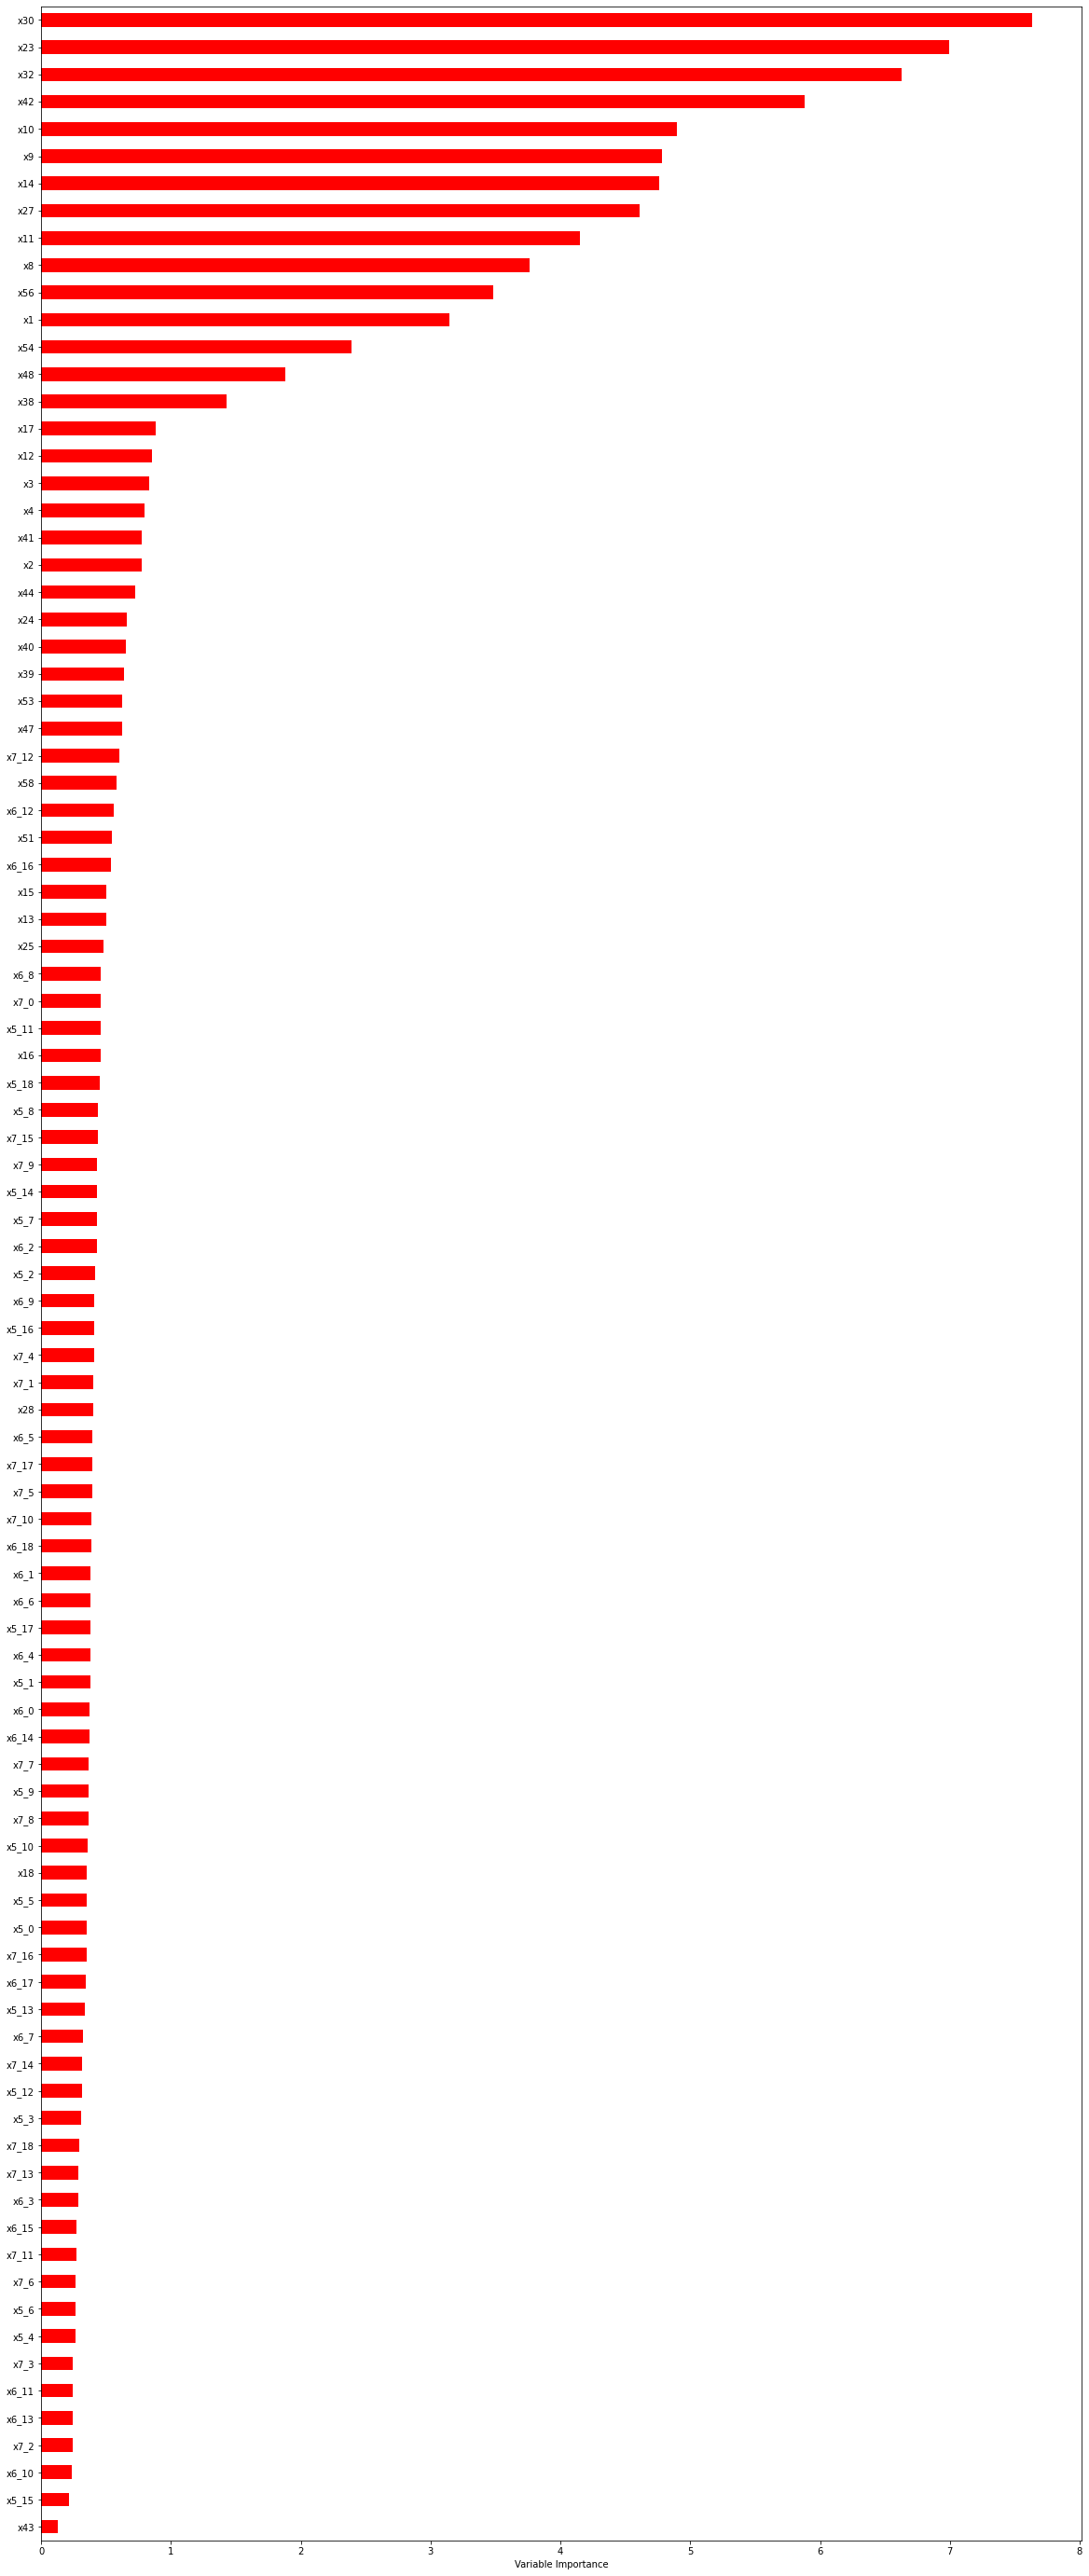

In [11]:
rf_model_feature=RandomForestClassifier(random_state=42, n_jobs = -1)
rf_model_feature.fit(X,y)
Importance=pd.DataFrame({'Importance':rf_model_feature.feature_importances_*100},index=X.columns)
Importance.sort_values(by='Importance',axis=0,ascending=True).plot(kind='barh',color='r',figsize=(20,50))
plt.xlabel("Variable Importance")
plt.gca().legend_=None

## Data Resampling with SMOTENC

In [12]:
cat_cols = []
for i in X.columns:
    if X[i].min() == 0.0 and X[i].max() == 1.0:
        cat_cols.append(i)
indices = [X.columns.get_loc(c) for c in cat_cols if c in X]
counter = Counter(y)
print('Before',counter)
smt = SMOTENC(categorical_features = indices)
X, y = smt.fit_resample(X, y)
counter = Counter(y)
print('After',counter)

Before Counter({0: 1565, 1: 509})
After Counter({0: 1565, 1: 1565})


## Train Test Split of Original Train Data for Validation Purpose

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [14]:
models = [LogisticRegression(solver = "liblinear"),
          DecisionTreeClassifier(),
          RandomForestClassifier(),
          GradientBoostingClassifier(),
          LGBMClassifier(),
          SGDClassifier(verbose = 0),
          svm.SVC(),
         ]

In [15]:
for model in models:
    t0 = time.time()
    model.fit(X,y)
    y_pred_train = model.predict(X)
    cv_score = cross_val_score(model,X,y,cv=10, scoring = "roc_auc").mean()
    bin_clf_rep = classification_report(y,y_pred_train, zero_division=1)
    name = str(model)
    print(name[0:name.find("(")])
    print("CV Score :", cv_score)
    print(bin_clf_rep)
    print(confusion_matrix(y,y_pred_train))
    print("Time Taken :", time.time()-t0, "seconds")
    print("------------------------------------------------------------")

LogisticRegression
CV Score : 0.947995263759595
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      1565
           1       0.91      0.85      0.88      1565

    accuracy                           0.89      3130
   macro avg       0.89      0.89      0.89      3130
weighted avg       0.89      0.89      0.89      3130

[[1438  127]
 [ 232 1333]]
Time Taken : 0.491610050201416 seconds
------------------------------------------------------------
DecisionTreeClassifier
CV Score : 0.8225053078556263
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1565
           1       1.00      1.00      1.00      1565

    accuracy                           1.00      3130
   macro avg       1.00      1.00      1.00      3130
weighted avg       1.00      1.00      1.00      3130

[[1565    0]
 [   0 1565]]
Time Taken : 0.9343559741973877 seconds
---------------------------------------------------

# Parameter Tuning

## Gradient Boosting Model

In [16]:
gb_model = GradientBoostingClassifier()
gb_params = {"learning_rate" : [0.01, 0.1, 0.3, 0.5, 1],
                  "max_depth" : [1,2,3,4,5],
                  "n_estimators" : [100, 200, 500],
            }
gb_cv_model = GridSearchCV(gb_model, 
                             gb_params, 
                             cv = 10,
                             verbose = 1,
                             n_jobs = -1,
                          scoring = "roc_auc")

In [17]:
gb_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 75 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:  7.8min finished


GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.3, 0.5, 1],
                         'max_depth': [1, 2, 3, 4, 5],
                         'n_estimators': [100, 200, 500]},
             scoring='roc_auc', verbose=1)

In [18]:
best_gb_params = gb_cv_model.best_params_
gb_model.set_params(**best_gb_params)

GradientBoostingClassifier(learning_rate=0.3, max_depth=1, n_estimators=500)

In [19]:
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.3, max_depth=1, n_estimators=500)

In [20]:
y_pred_test = gb_model.predict(X_test)
y_pred_proba = gb_model.predict_proba(X_test)
cv_roc_score = cross_val_score(gb_model,X_train,y_train,cv=10, scoring = "roc_auc").mean()
print("Roc Auc CV Score: ",cv_roc_score)
cv_acc_score = cross_val_score(gb_model,X_train,y_train,cv=10, scoring = "accuracy").mean()
print("Accuracy CV Score:",cv_acc_score)
roc_score = roc_auc_score(y_test, y_pred_proba[:,1])
print("Test Roc Score: ",roc_score)
bin_clf_rep = classification_report(y_test,y_pred_test, zero_division=1)
print(bin_clf_rep)
conf_matrix = confusion_matrix(y_test,y_pred_test)
print("Confusion Matrix: ", conf_matrix)

Roc Auc CV Score:  0.9521105568924263
Accuracy CV Score: 0.8761896414342629
Test Roc Score:  0.9511426319936959
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       329
           1       0.87      0.87      0.87       297

    accuracy                           0.87       626
   macro avg       0.87      0.87      0.87       626
weighted avg       0.87      0.87      0.87       626

Confusion Matrix:  [[289  40]
 [ 40 257]]


## Training Gradient Boosting Model for Submission

In [21]:
gb_model.fit(X,y)
y_pred_gb_model = gb_model.predict_proba(X_valid)
y_pred_gb_model = y_pred_gb_model[:,1]
y_pred_round = np.around(y_pred_gb_model, decimals = 5)
np.savetxt("gb_result_prob.csv", y_pred_round, encoding = "utf-8")

# Random Forest

In [22]:
kfold = KFold(n_splits = 10, shuffle = True, random_state = 42)
rf_params={"max_depth":[5,10,15],
           "min_samples_leaf":[2,3,5],
          "n_estimators":[200,500]}

rf_model=RandomForestClassifier(random_state=42,
                               n_jobs = -1)

rf_cv_model=GridSearchCV(rf_model,rf_params,cv=kfold,verbose=1, scoring ="roc_auc").fit(X_train,y_train)

Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:  3.3min finished


In [23]:
best_rf_params = rf_cv_model.best_params_
best_rf_params

{'max_depth': 15, 'min_samples_leaf': 2, 'n_estimators': 200}

In [24]:
rf_model=RandomForestClassifier(random_state=42, max_depth=15,min_samples_leaf =2,n_estimators=200, n_jobs = -1)
rf_tuned=rf_model.fit(X_train,y_train)
y_pred_test = rf_tuned.predict(X_test)
y_pred_proba = rf_tuned.predict_proba(X_test)
cv_roc_score = cross_val_score(rf_tuned,X_train,y_train,cv=10, scoring = "roc_auc").mean()
print("Roc Auc CV Score: ",cv_roc_score)
cv_acc_score = cross_val_score(rf_tuned,X_train,y_train,cv=10, scoring = "accuracy").mean()
print("Accuracy CV Score:",cv_acc_score)
roc_score = roc_auc_score(y_test, y_pred_proba[:,1])
print("Test Roc Score: ",roc_score)
bin_clf_rep = classification_report(y_test,y_pred_test, zero_division=1)
print(bin_clf_rep)
conf_matrix = confusion_matrix(y_test,y_pred_test)
print("Confusion Matrix: ", conf_matrix)

Roc Auc CV Score:  0.953461621044419
Accuracy CV Score: 0.868207171314741
Test Roc Score:  0.9468852660342023
              precision    recall  f1-score   support

           0       0.89      0.82      0.85       329
           1       0.82      0.88      0.85       297

    accuracy                           0.85       626
   macro avg       0.85      0.85      0.85       626
weighted avg       0.85      0.85      0.85       626

Confusion Matrix:  [[271  58]
 [ 35 262]]


## Training Gradient Boosting Model for Submission

In [25]:
rf_tuned.fit(X,y)
y_pred_rf_model = rf_tuned.predict_proba(X_valid)
y_pred_rf_model = y_pred_rf_model[:,1]
y_pred_round = np.around(y_pred_rf_model, decimals = 5)
np.savetxt("rf_result_prob.csv", y_pred_round, encoding = "utf-8")